In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import optimize
import scipy
import seaborn as sns
import ROOT
from sklearn.linear_model import LinearRegression

Fazendo os gráficos mostrados no PDF

aqui vamos explorar os gráficos de PDFs

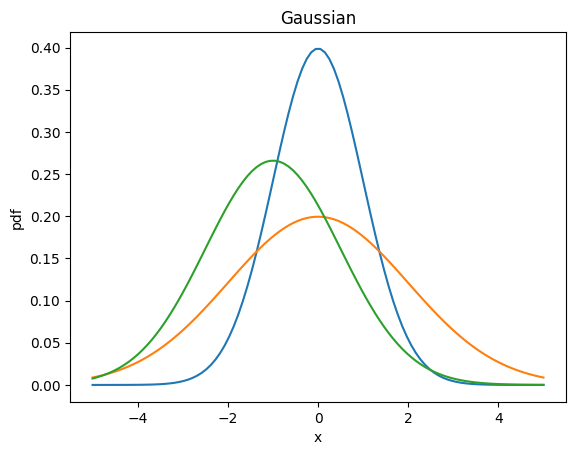

In [2]:
for values in [(0, 1), (0, 2), (-1, 1.5)]:
    x = np.linspace(-5, 5, 100)
    y = stats.norm.pdf(x, loc=values[0], scale=values[1]) 
    plt.plot(x, y)
    plt.title('Gaussian')
    plt.xlabel('x')
    plt.ylabel('pdf')
plt.show()

# cristal ball (pagina 10)

In [3]:
def crystal_ball(x, beta, m):
    if x >= -beta:
        return np.exp(-x**2 / 2)
    else:
        n = (m / abs(beta))**m * np.exp(-beta**2 / 2)
        return n * (m / abs(beta) - beta - x)**(-m)

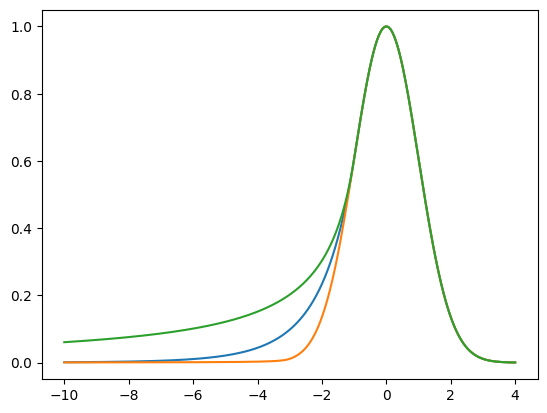

In [4]:
x = np.linspace(-10, 4, 500)
for values in [(1, 10), (3, 1), (1, 1)]:
    gaussian_y = stats.norm.pdf(x, loc=0, scale=1)
    crystal_ball_y = np.array([crystal_ball(xi, beta=values[0], m=values[1]) for xi in x])
    plt.plot(x, crystal_ball_y)
plt.show()

página 18

o jeito que ocorre no Root, ele está fitando uma curva gaussiana;

no jeito padrão, faríamos o abaixo:

In [5]:
x = np.linspace(-10, 10, 50000)
y = stats.norm.pdf(x, loc=0, scale=3)

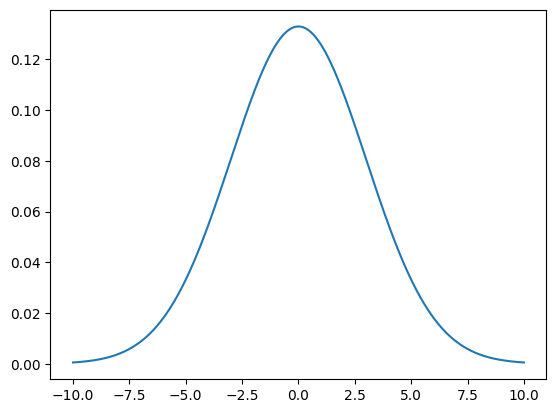

In [6]:
plt.plot(x, y)
plt.show()

O mesmo código abaixo [está aqui](plotGaussian.cpp)

aqui exploramos um pouco como o root plota diferente, já que o mean e o width são vetores e não valores fixos, o que gera um plot levemente diferente

do acima, mesmo com os mesmos valores 0 e 3

In [7]:
x_root = ROOT.RooRealVar("x", "x", 0, -10, 10)
mean_root = ROOT.RooRealVar("mean", "mean da gaussian", 0, -1, 10)
width_root = ROOT.RooRealVar("width", "width", 3, 0.1, 10)
g = ROOT.RooGaussian("g", "gaussian", x_root, mean_root, width_root)
frame = x_root.frame()

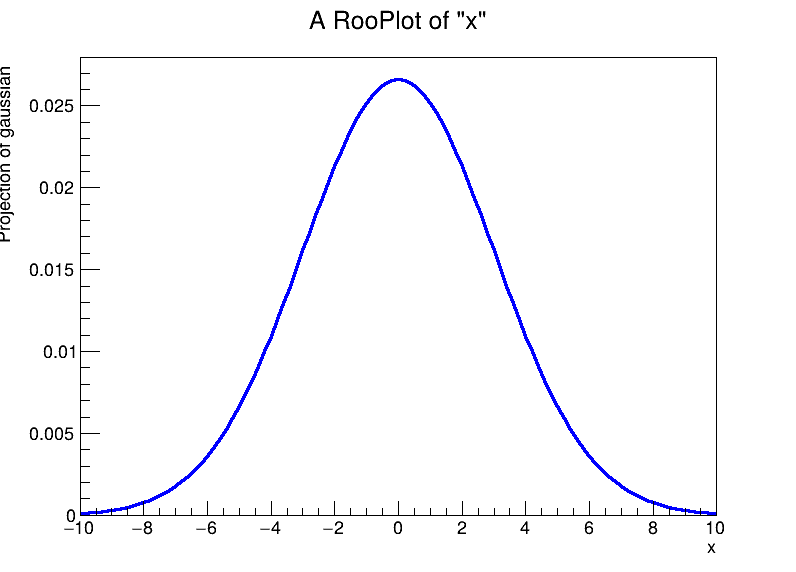

In [8]:
c = ROOT.TCanvas("c", "Canvas", 800, 600)
g.plotOn(frame)
frame.Draw()
c.Draw()

Gerando valores aleatórios

In [9]:
dist_aleatorios = stats.norm.rvs(size=10000, loc=0, scale=3)

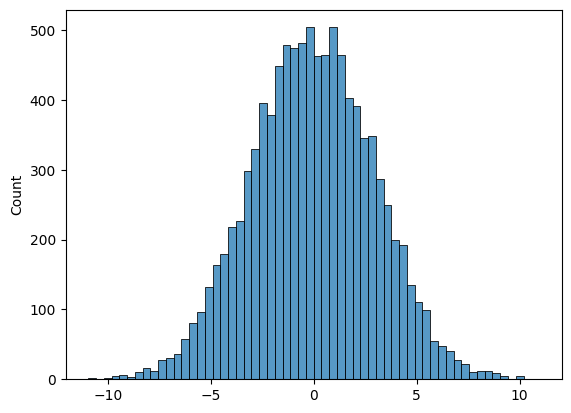

In [10]:
sns.histplot(dist_aleatorios)
plt.show()

Mesmo plot utilizando ROOT

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


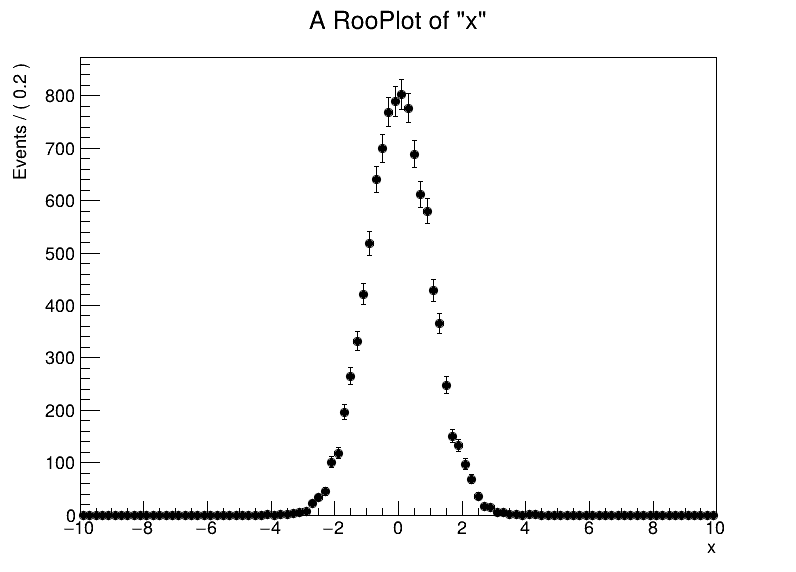

In [11]:
x = ROOT.RooRealVar("x", "x", -10, 10)
mean = ROOT.RooRealVar("mean", "Mean", 0, -10, 10)
sigma = ROOT.RooRealVar("sigma", "Sigma", 1, 0.1, 10)
gauss = ROOT.RooGaussian("gauss", "Gaussian", x, mean, sigma)
toyData = gauss.generate(ROOT.RooArgSet(x), 10000)
c = ROOT.TCanvas("c", "Canvas", 800, 600)
frame = x.frame()
toyData.plotOn(frame)
frame.Draw()
c.Draw()

Realizando Fit em ROOT

[#1] INFO:Fitting -- RooAbsPdf::fitTo(gauss_over_gauss_Int[x]) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- using CPU computation library compiled with -mavx512
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_gauss_over_gauss_Int[x]_gaussData) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
Minuit2Minimizer: Minimize with max-calls 1000 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 14146.5984921158142
Edm   = 9.86803422443921862e-06
Nfcn  = 28
mean	  = 0.00112324	 +/-  0.00995699	(limited)
sigma	  = 0.995699	 +/-  0.00704037	(limited)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization


Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       14146.78734 Edm =      0.1897034642 NCalls =     11
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 14146.78734
  Edm           : 0.1897034642
  Internal parameters:	[                0    -0.9582415885]	
  Internal gradient  :	[     -112.3241961      242.4607976]	
  Internal covariance matrix:
[[  2.0000018e-06              0]
 [              0  1.2478565e-05]]]
Info in <Minuit2>: VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 1000
Info in <Minuit2>: VariableMetricBuilder    0 - FCN =       14146.78734 Edm =      0.1897034642 NCalls =     11
Info in <Minuit2>: VariableMetricBuilder    1 - FCN =       14146.59849 Edm =   1.014071537e-05 NCalls =     18
Info in <Minuit2>: VariableMetricBuilder After Hessian
Info in <Minuit2>: VariableMetricBuilder    2 - FCN =       14146.59849 Edm =   9.86803

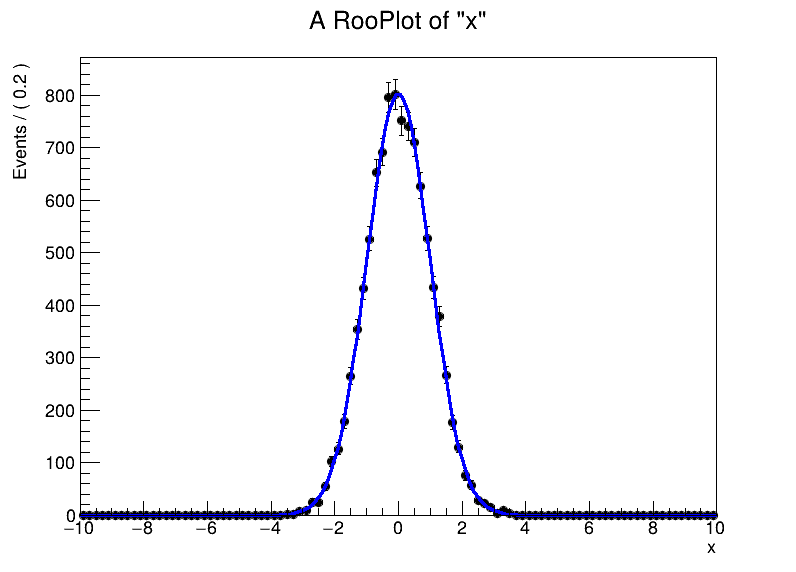

In [12]:
x = ROOT.RooRealVar("x", "x", -10, 10)
mean = ROOT.RooRealVar("mean", "Mean", 0, -10, 10)
sigma = ROOT.RooRealVar("sigma", "Sigma", 1, 0.1, 10)
gauss = ROOT.RooGaussian("gauss", "Gaussian", x, mean, sigma)
toyData = gauss.generate(ROOT.RooArgSet(x), 10000)
gauss.fitTo(toyData)
frame = x.frame()
toyData.plotOn(frame)
gauss.plotOn(frame)
c = ROOT.TCanvas("c", "Canvas", 800, 600)
c.cd()
frame.Draw()
c.Draw()

Realizando fit em python

In [13]:
x = stats.norm.rvs(size=1000, loc=0, scale=1)
dist = np.linspace(0, 5, 100)
mean, sigma = stats.norm.fit(x)
print(f"mean: {mean}, sigma: {sigma}")

mean: -0.00550118686830984, sigma: 0.9604275958321306


In [14]:
mean, sigma = stats.norm.fit(x)

In [15]:
mean, sigma

(np.float64(-0.00550118686830984), np.float64(0.9604275958321306))

note que essa função abaixo retorna a probabilidade do valor estar ali

In [16]:
prob = stats.norm.pdf(dist, loc=mean, scale=sigma)

<Axes: >

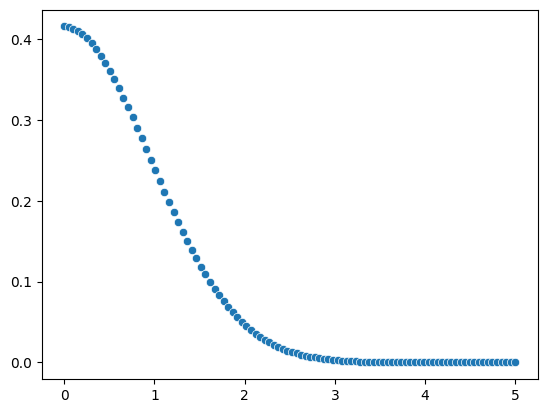

In [17]:
sns.scatterplot(x=dist, y=prob)

Expressões genéricas (PDFs genéricas)

In [18]:
x = ROOT.RooRealVar("x", "x", -10, 10)
y = ROOT.RooRealVar("y", "y", 1, 5)
a = ROOT.RooRealVar("a", "a", 3.0)
b = ROOT.RooRealVar("b", "b", -2.0)
generic = ROOT.RooGenericPdf("model", "generic_model", "x*y+a-b", ROOT.RooArgSet(x,y,a,b))

In [19]:
data = ROOT.RooDataSet("data", "synthetic_data", ROOT.RooArgSet(x, y))

for i in range(10000):
    x.setVal(ROOT.gRandom.Uniform(-10, 10)) 
    y.setVal(ROOT.gRandom.Uniform(-10, 10)) 
    data.add(ROOT.RooArgSet(x, y))

In [20]:
data.Print("v")

DataStore data (synthetic_data)
  Contains 10000 entries
  Observables: 
    1)  x = 5.60287  L(-10 - 10)  "x"
    2)  y = 1  L(1 - 5)  "y"


In [21]:
generic.fitTo(data)

<cppyy.gbl.RooFitResult object at 0x(nil)>

[#1] INFO:Fitting -- RooAbsPdf::fitTo(model_over_model_Int[x,y]) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_model_over_model_Int[x,y]_data) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#0] WARNING:Minimization -- RooMinimizer::hesse: Error, run Migrad before Hesse!
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization


Error in <ROOT::Math::Fitter::SetFCN>: FCN function has zero parameters 


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


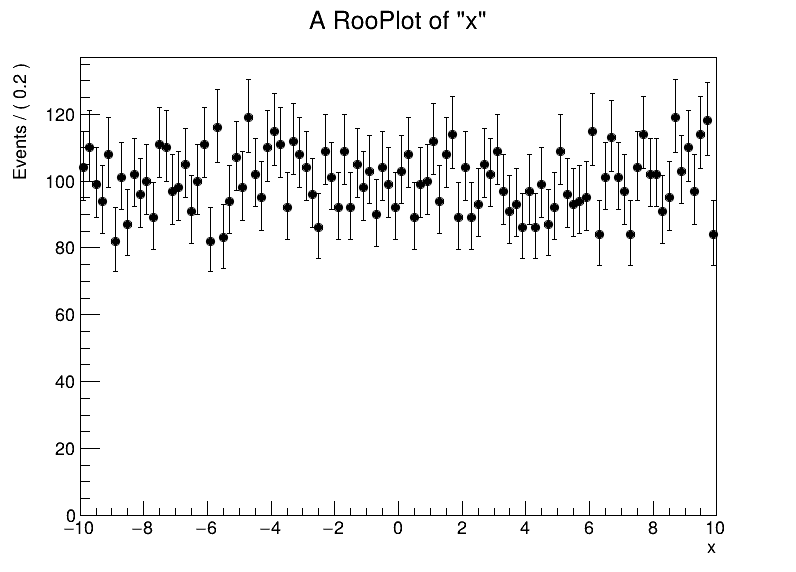

In [22]:
x_plot = x.frame()
data.plotOn(x_plot)
c = ROOT.TCanvas("c", "Canvas", 800, 600)
x_plot.Draw()
c.Draw()

In [23]:
# esse fit não funcionou
# x_plot = x.frame()
# data.plotOn(x_plot)
# generic.plotOn(x_plot)
# c = ROOT.TCanvas("c", "Canvas", 800, 600)
# x_plot.Draw()
# c.Draw()

In [24]:
# result = generic.fitTo(toyData)

Fitando uma função genérica usando python

In [25]:
def exp_custom_func(xy, a=2, b=-3):
    x,y = xy
    return np.exp(x*y + a) - b

In [26]:
num_points = 10000
x_data = np.random.uniform(0.05, 1, num_points)
y_data = np.random.uniform(0, 2, num_points)
z_data = exp_custom_func((x_data, y_data))  # True values for a and b

<Axes: >

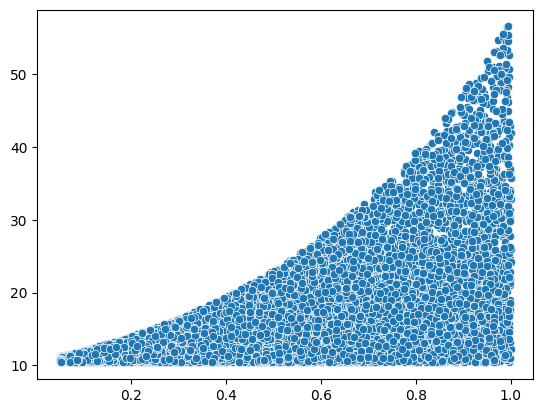

In [27]:
sns.scatterplot(x=x_data, y=z_data)

<Axes: >

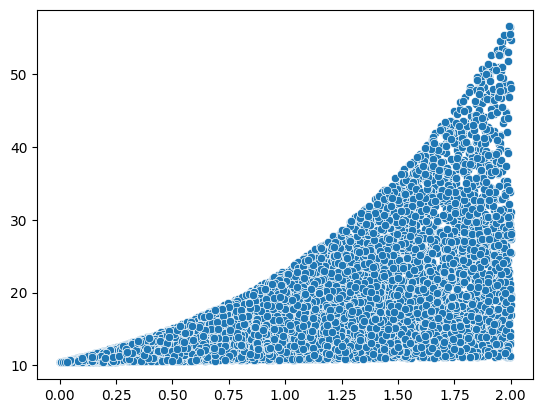

In [28]:
sns.scatterplot(x=y_data, y=z_data)

In [29]:
popt, pcov = scipy.optimize.curve_fit(exp_custom_func, (x_data, y_data), z_data, p0=[2.5, -1.5])

In [30]:
popt # encontrou corretamente a e b

array([ 2., -3.])

In [31]:
pcov # matriz de covariancia

array([[0., 0.],
       [0., 0.]])

gerando uma linha e somando valores gaussianos nela

In [32]:
# valor de 0 a 10, com 1000 steps
x_linear = np.linspace(-2, 2, 1000)
y_linear = 0.8 * x_linear

nossa reta, bem simples:

<Axes: >

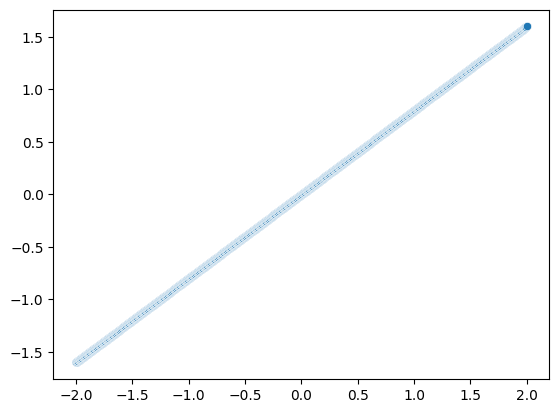

In [33]:
sns.scatterplot(x=x_linear, y=y_linear)

gerando os dados para a gaussiana agora:

In [34]:
x_gauss = stats.norm.pdf(x_linear, loc=0, scale=0.5)

<Axes: >

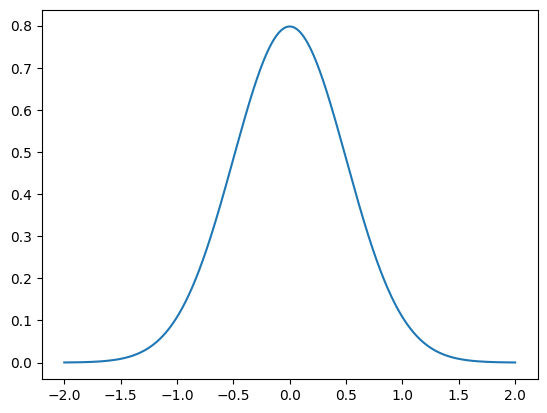

In [35]:
sns.lineplot(x=x_linear, y=x_gauss)

valores finais, somando o linear e o gaussiano

In [36]:
#                                 caso queiramos adicionar ruído
y_final = y_linear + x_gauss #+  np.random.random(len(y_final)) * 0.2

resultado final

<Axes: >

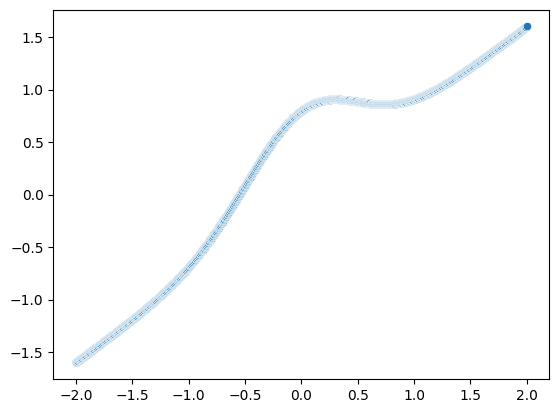

In [37]:
sns.scatterplot(x=x_linear, y=y_final)

In [38]:
def custom_func(x, a, d, e):
  return a * x + stats.norm.pdf(x, loc=d, scale=e)

In [39]:
popt, pcov = optimize.curve_fit(custom_func, x_linear, y_final)

encontrou corretamente todos os valores (sem ruído, sem nada, só estamos testando)

In [40]:
popt

array([8.0000000e-01, 2.2222077e-10, 5.0000000e-01])

In [41]:
y_fit = custom_func(x_linear, *popt)

<Axes: >

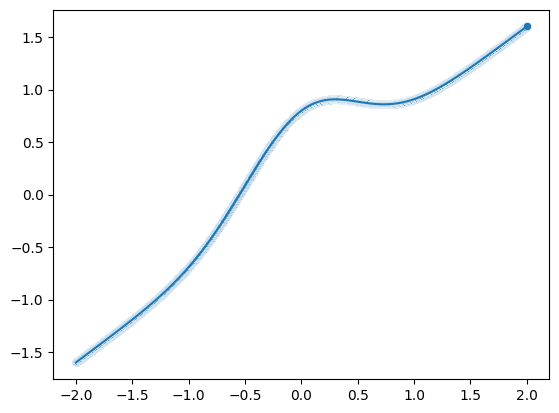

In [42]:
sns.lineplot(x=x_linear, y=y_final)
sns.scatterplot(x=x_linear, y=y_fit)

fitando separadamente:

In [43]:
ln = LinearRegression(fit_intercept=False) # não temos intercept na nossa curva
ln.fit(x_linear.reshape(-1, 1), y_final.reshape(-1, 1))

LinearRegression(fit_intercept=False)

In [44]:
ln.coef_

array([[0.8]])

In [45]:
valores_fitados_linear = ln.predict(x_linear.reshape(-1, 1))

plot do fit linear:

<Axes: >

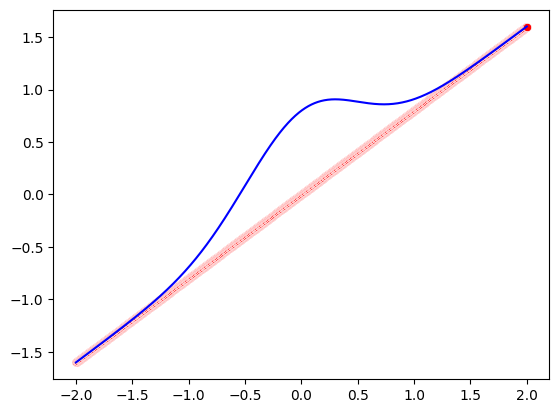

In [46]:
sns.scatterplot(y=valores_fitados_linear.flatten(), x=x_linear, color='red')
sns.lineplot(x=x_linear, y=y_final, color='blue')

In [47]:
stats.norm.fit(x_linear)

(np.float64(0.0), np.float64(1.1558558168456836))

In [48]:
fit_gauss = stats.norm.pdf(x_linear, loc=0, scale=1.15)

fit da gaussiana:

<Axes: >

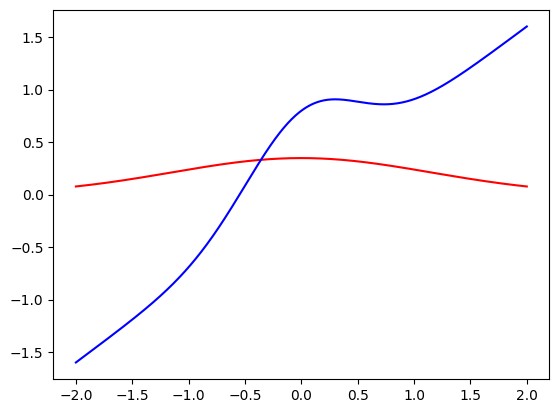

In [49]:
sns.lineplot(x=x_linear, y=fit_gauss, color='red')
sns.lineplot(x=x_linear, y=y_final, color='blue')

separadamente os fits são bem ruins.